# Explorative data analysis
### Clean data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
DataSet = pd.read_table('IFA_data.csv', ',')
DataSet.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning:

In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only



age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  goal  
0    3.0  0.0  6.0     0  
1    2.0  3.0  3.0     2  
2    2.0  2.0  7.0     1  
3    3.0  0.0  3.0     0  
4    1.0  0.0  3.0     0

In [34]:
# Remove invalid values ('?')
DataSet = DataSet[~DataSet.isin(['?']).any(axis=1)]

In [35]:
DataSet.dtypes
DataSet['ca']= DataSet['ca'].astype('float')
#DataSet['goal']= DataSet['goal'].astype('category')
DataSet.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal         object
goal          int64
dtype: object

In [36]:
print(DataSet.shape)
print(DataSet.info())

(297, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    object 
 13  goal      297 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 34.8+ KB
None


In [37]:
DataSet.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
297    False
298    False
299    False
300    False
301    False
Length: 297, dtype: bool>

In [38]:
DataSet.dropna()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     2  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
297    2.0  0.0  7.0     1  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     2  
300    2.0  1.0  7.0     3  
301    2.0  1.0  3.0     1  

[297 rows x 14 columns]

###Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



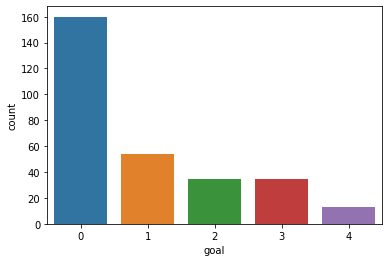

In [39]:
import seaborn as sns
sns.countplot(DataSet['goal'],label="Count")
plt.show()

###Boxplot

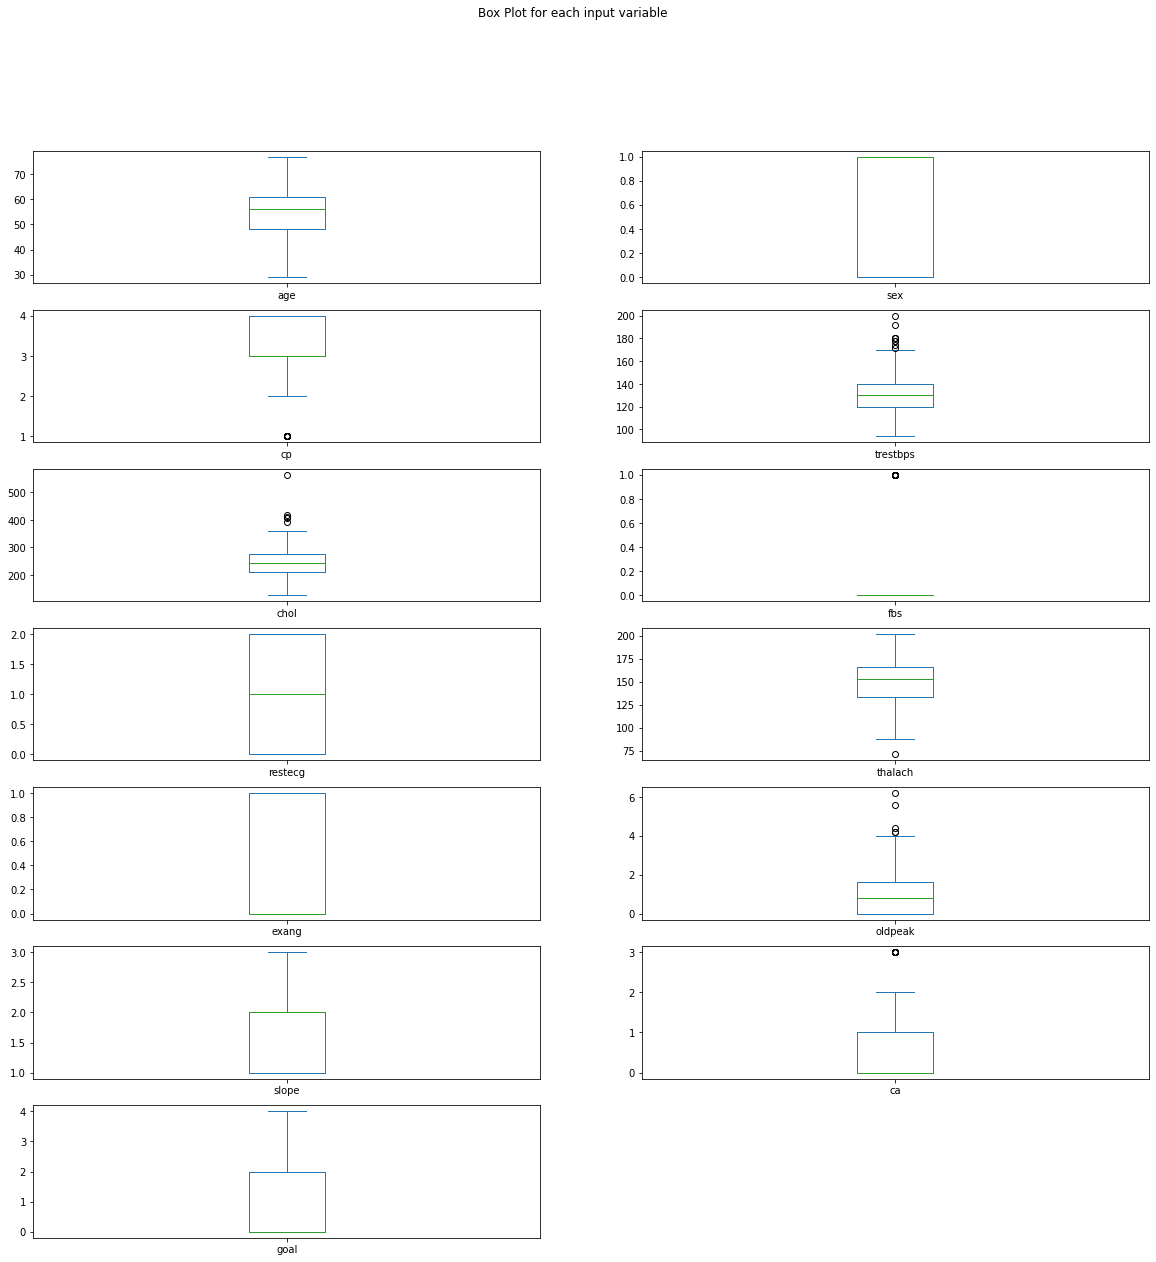

In [40]:
DataSet.plot(kind='box', subplots=True, layout=(7,2), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Box Plot for each input variable')
plt.savefig('GOAL')
plt.show()

###Histogram

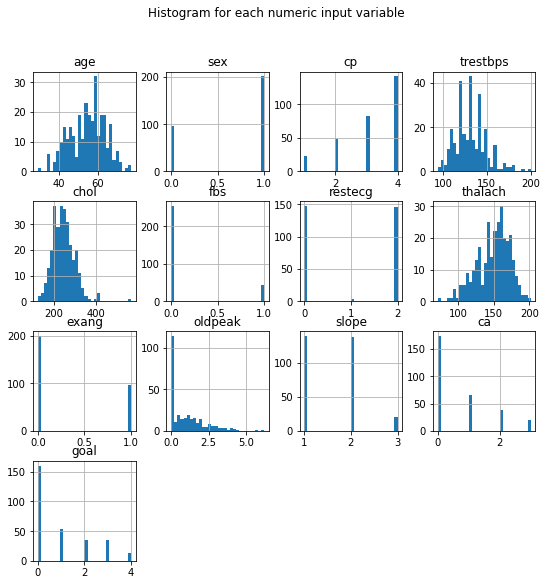

In [41]:
import pylab as pl
DataSet.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('hist')
plt.show()

###Scatter matrix

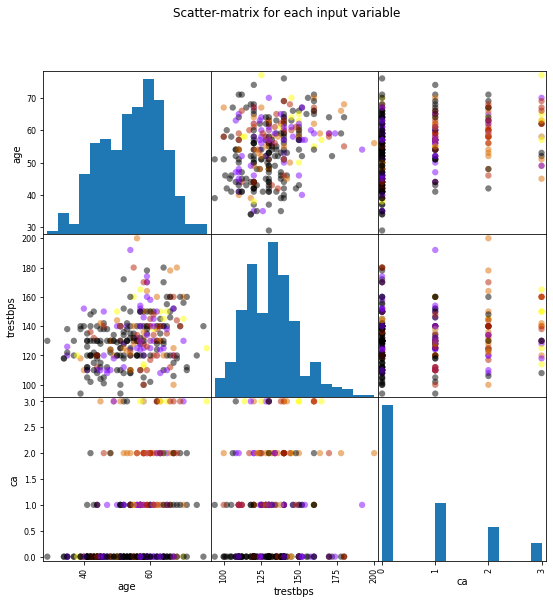

In [42]:
#from pandas.tools.plotting import scatter_matrix

from matplotlib import cm
feature_names = ['age','trestbps','ca']
X = DataSet[feature_names]
y = DataSet['goal']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')
plt.show()

In [43]:
pp = sns.pairplot(DataSet)
plt.show()

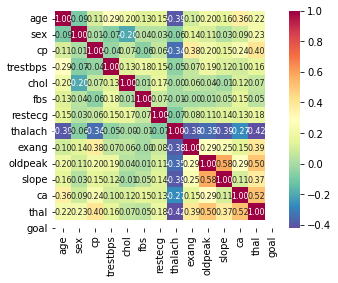

In [44]:
corrmat = DataSet.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size':8}, 
                 yticklabels=DataSet.columns, 
                 xticklabels=DataSet.columns, 
                 cmap="Spectral_r")
plt.show()

#Data classification
###Prepare test and training data sets

##Multilabel outcome

In [45]:
### build dataframe result

result_df= pd.DataFrame(columns=['goal','classifer', 'sens', 'acc','spec' ])

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

labels   = DataSet.goal
features = DataSet[['age', 'ca', 'trestbps']]

# Create test and training data subsets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=0, test_size=0.2)
scaler = MinMaxScaler()

# Scale features to same scale
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

###Fit decision tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


# Classify data
tree = DecisionTreeClassifier().fit(features_train, labels_train)
print(f"Accuracy of Decision Tree classifier on training set: {round(tree.score(features_train, labels_train), 4)}")
print(f"Accuracy of Decision Tree classifier on test set: {round(tree.score(features_test, labels_test), 4)}")

labels_pred = tree.predict(features_test)
tree_cm = confusion_matrix(labels_test, labels_pred)


FP = tree_cm.sum(axis=0) - np.diag(tree_cm)  
FN = tree_cm.sum(axis=1) - np.diag(tree_cm)
TP = np.diag(tree_cm)
TN = tree_cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specifity = TN/(TN+FP) 
# Overall accuracy
accuracy = (TP+TN)/(TP+FP+FN+TN)

tree_eval = [sensitivity.mean(), specifity.mean(), accuracy.mean()]

print(f"\nSensitivity from confusion matrix is: {round(sensitivity.mean(), 4)}")
print(f"Specifity from confusion matrix is: {round(specifity.mean(), 4)}")
print(f"Accuracy from confusion matrix is: {round(accuracy.mean(), 4)}")

Accuracy of Decision Tree classifier on training set: 0.962
Accuracy of Decision Tree classifier on test set: 0.4167

Sensitivity from confusion matrix is: 0.2519
Specifity from confusion matrix is: 0.8352
Accuracy from confusion matrix is: 0.7667


In [48]:
def calc(cm1): 
    res=[]


    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    #print("accuracy: ", accuracy)
    res.append(accuracy)
    

    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    res.append(sensitivity)

    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    res.append(specificity)

    return res

In [49]:
## build table 
table1 = pd.DataFrame(columns=['classifier', 'accuracy', 'sensitivity', 'specificity'])

[0.6833333333333333, 0.6666666666666666, 0.7]
[0.6333333333333333, 0.7708333333333334, 0.08333333333333333]
[0.7833333333333333, 0.8679245283018868, 0.14285714285714285]
[0.8333333333333334, 0.8888888888888888, 0.3333333333333333]
[0.9, 0.9818181818181818, 0.0]
      classifier  accuracy  sensitivity  specificity
0  decision_tree    0.7667       0.8352       0.7667


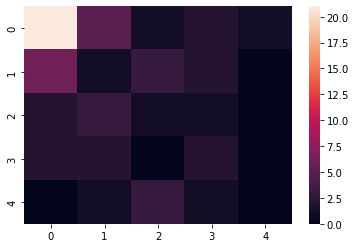

In [50]:
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

tree_res=pd.DataFrame(columns=['acc','sens','spec' ])
# Classify data
tree = DecisionTreeClassifier().fit(features_train, labels_train)

labels_pred = tree.predict(features_test)
tree_cm = sklearn.metrics.multilabel_confusion_matrix(labels_test, labels_pred)
tree_scm= confusion_matrix(labels_test, labels_pred)

for i in tree_cm:
  
  paras = calc(i)
  print(paras)
  tree_res.loc[len(tree_res.index)]= paras


avg_acc= round(sum(list(tree_res['acc']))/len(list(tree_res['acc'])), 4)
avg_sens= round(sum(list(tree_res['sens']))/len(list(tree_res['sens'])), 4)
avg_spec= round(sum(list(tree_res['acc']))/len(list(tree_res['acc'])), 4)



table1 =table1.append({'classifier' : 'decision_tree',
                'accuracy': avg_acc,
                  'sensitivity': avg_sens,
                  'specificity': avg_spec} , 
                ignore_index=True)

print(table1)


### plot heat map 

import seaborn as sns
sns.heatmap(tree_scm)

###Fit KNN classifier

Accuracy of K-NN classifier on training set: 0.6245
Accuracy of K-NN classifier on test set: 0.55
[0.75, 0.6, 0.9]
[0.75, 0.8541666666666666, 0.3333333333333333]
[0.8166666666666667, 0.9245283018867925, 0.0]
[0.8833333333333333, 0.9629629629629629, 0.16666666666666666]
[0.9, 0.9636363636363636, 0.2]
        acc      sens      spec
0  0.683333  0.666667  0.700000
1  0.633333  0.770833  0.083333
2  0.783333  0.867925  0.142857
3  0.833333  0.888889  0.333333
4  0.900000  0.981818  0.000000
      classifier  accuracy  sensitivity  specificity
0  decision_tree    0.7667       0.8352       0.7667
1            knn    0.8200       0.8611       0.3200


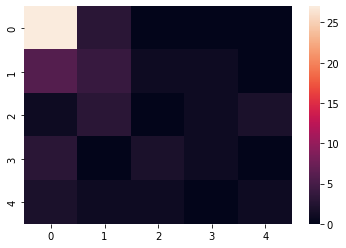

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(features_train, labels_train)


knn_res=pd.DataFrame(columns=['acc','sens','spec' ])
print(f"Accuracy of K-NN classifier on training set: {round(knn.score(features_train, labels_train), 4)}")
print(f"Accuracy of K-NN classifier on test set: {round(knn.score(features_test, labels_test), 4)}")

labels_pred = knn.predict(features_test)
knn_cm = sklearn.metrics.multilabel_confusion_matrix(labels_test, labels_pred)
knn_scm = confusion_matrix(labels_test, labels_pred)

for i in knn_cm:
  
  paras = calc(i)
  print(paras)
  knn_res.loc[len(knn_res.index)]= paras

print(tree_res)

avg_acc= round(sum(list(knn_res['acc']))/len(list(knn_res['acc'])), 4)
avg_sens= round(sum(list(knn_res['sens']))/len(list(knn_res['sens'])), 4)
avg_spec= round(sum(list(knn_res['spec']))/len(list(knn_res['spec'])), 4)



table1 =table1.append({'classifier' : 'knn',
                'accuracy': avg_acc,
                  'sensitivity': avg_sens,
                  'specificity': avg_spec} , 
                ignore_index=True)

print(table1)

### plot 
sns.heatmap(knn_scm)

###Fit logistic regression classifier

Accuracy of logistic regression classifier on training set: 0.6245
Accuracy of logistic regression classifier on test set: 0.55
[[[ 5 25]
  [ 0 30]]

 [[48  0]
  [12  0]]

 [[53  0]
  [ 7  0]]

 [[50  4]
  [ 5  1]]

 [[55  0]
  [ 5  0]]]
[0.5833333333333334, 0.16666666666666666, 1.0]
[0.8, 1.0, 0.0]
[0.8833333333333333, 1.0, 0.0]
[0.85, 0.9259259259259259, 0.16666666666666666]
[0.9166666666666666, 1.0, 0.0]
        acc      sens      spec
0  0.583333  0.166667  1.000000
1  0.800000  1.000000  0.000000
2  0.883333  1.000000  0.000000
3  0.850000  0.925926  0.166667
4  0.916667  1.000000  0.000000
            classifier  accuracy  sensitivity  specificity
0        decision_tree    0.7667       0.8352       0.7667
1                  knn    0.8200       0.8611       0.3200
2  logistic_regression    0.8067       0.8185       0.2333


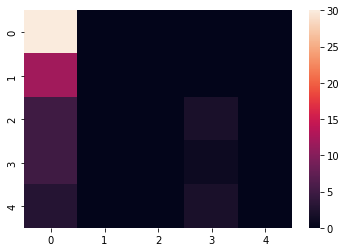

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(features_train, labels_train)



logreg_res=pd.DataFrame(columns=['acc','sens','spec' ])
print(f"Accuracy of logistic regression classifier on training set: {round(knn.score(features_train, labels_train), 4)}")
print(f"Accuracy of logistic regression classifier on test set: {round(knn.score(features_test, labels_test), 4)}")


labels_pred = logreg.predict(features_test)
logreg_cm = sklearn.metrics.multilabel_confusion_matrix(labels_test, labels_pred)
print(logreg_cm)
logreg_scm = confusion_matrix(labels_test, labels_pred)

for i in logreg_cm:
  
  paras = calc(i)
  print(paras)
  logreg_res.loc[len(logreg_res.index)]= paras

print(logreg_res)

avg_acc= round(sum(list(logreg_res['acc']))/len(list(logreg_res['acc'])), 4)
avg_sens= round(sum(list(logreg_res['sens']))/len(list(logreg_res['sens'])), 4)
avg_spec= round(sum(list(logreg_res['spec']))/len(list(logreg_res['spec'])), 4)



table1 =table1.append({'classifier' : 'logistic_regression',
                'accuracy': avg_acc,
                  'sensitivity': avg_sens,
                  'specificity': avg_spec} , 
                ignore_index=True)

print(table1)

#plot 
sns.heatmap(logreg_scm)

##Metric comparison (multilabel)

###Bar plot

In [53]:
##### Bar plot 

##barplot 
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar( y=table1['accuracy'], x=table1['classifier'], name='accuracy'),
    go.Bar( y=table1['specificity'], x=table1['classifier'], name='specificity'),
    go.Bar(y=table1['sensitivity'], x=table1['classifier'], name='sensitivity')
])



# Change the bar mode
#fig2.update_layout(barmode='group')
fig.show()

fig_seperate = go.Figure(data=[
    go.Bar( y=[logreg_res['acc'][0]], x=['logistic regression'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[logreg_res['acc'][1]], x=['logistic regression'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[logreg_res['acc'][2]], x=['logistic regression'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[logreg_res['acc'][3]], x=['logistic regression'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[logreg_res['acc'][4]], x=['logistic regression'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[logreg_res['spec'][0]], x=['logistic regression'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[logreg_res['spec'][1]], x=['logistic regression'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[logreg_res['spec'][2]], x=['logistic regression'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[logreg_res['spec'][3]], x=['logistic regression'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[logreg_res['spec'][4]], x=['logistic regression'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[logreg_res['spec'][0]], x=['logistic regression'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[logreg_res['spec'][1]], x=['logistic regression'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[logreg_res['spec'][2]], x=['logistic regression'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[logreg_res['spec'][3]], x=['logistic regression'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[logreg_res['spec'][4]], x=['logistic regression'], name='sensitivity', marker={'color': '#00CC96'}),

    go.Bar( y=[knn_res['acc'][0]], x=['knn'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[knn_res['acc'][1]], x=['knn'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[knn_res['acc'][2]], x=['knn'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[knn_res['acc'][3]], x=['knn'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[knn_res['acc'][4]], x=['knn'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[knn_res['spec'][0]], x=['knn'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[knn_res['spec'][1]], x=['knn'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[knn_res['spec'][2]], x=['knn'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[knn_res['spec'][3]], x=['knn'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[knn_res['spec'][4]], x=['knn'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[knn_res['spec'][0]], x=['knn'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[knn_res['spec'][1]], x=['knn'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[knn_res['spec'][2]], x=['knn'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[knn_res['spec'][3]], x=['knn'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[knn_res['spec'][4]], x=['knn'], name='sensitivity', marker={'color': '#00CC96'}),

    go.Bar( y=[tree_res['acc'][0]], x=['decision tree'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[tree_res['acc'][1]], x=['decision tree'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[tree_res['acc'][2]], x=['decision tree'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[tree_res['acc'][3]], x=['decision tree'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[tree_res['acc'][4]], x=['decision tree'], name='accuracy', marker={'color': '#636EFA'}),
    go.Bar( y=[tree_res['spec'][0]], x=['decision tree'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[tree_res['spec'][1]], x=['decision tree'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[tree_res['spec'][2]], x=['decision tree'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[tree_res['spec'][3]], x=['decision tree'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[tree_res['spec'][4]], x=['decision tree'], name='specifity', marker={'color': '#EF553B'}),
    go.Bar( y=[tree_res['spec'][0]], x=['decision tree'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[tree_res['spec'][1]], x=['decision tree'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[tree_res['spec'][2]], x=['decision tree'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[tree_res['spec'][3]], x=['decision tree'], name='sensitivity', marker={'color': '#00CC96'}),
    go.Bar( y=[tree_res['spec'][4]], x=['decision tree'], name='sensitivity', marker={'color': '#00CC96'})


])
fig_seperate.update_layout(showlegend=False)

fig_seperate.show()

##Binary outcome 


In [ ]:
## change class labels  to only “heart disease vs. no heart disease”
## 0 = no heart disease 
## 1 = heart disease 
bdf =DataSet
bdf.loc[(bdf['goal']>=1) ,'goal']=1
bdf

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  goal  
0      3.0  0.0  6.0     0  
1      2.0  3.0  3.0     1  
2      2.0  2.0  7.0     1  
3      3.0  0.0  3.0     0  
4      1.0  0.0  3.0     0  
..     ...  ...  ...   ...  
297    2.0  0.0  7.0     1  
298    2.0  0.0  7.0     1  
299    2.0  2.0  7.0     1  
300    2.0  1.0  7.0     1  
301    2.0  1.0  3.0     1  

[297 rows x 14 columns]

### New training and test data 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

Y  = bdf.goal
X = bdf[['age', 'ca', 'trestbps']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




## build table 
table = pd.DataFrame(columns=['classifier', 'accuracy', 'sensitivity', 'specificity'])

### Desicon Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


dtree = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtree.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtree.score(X_test, Y_test)))
pred= dtree.predict(X_test)
cm1 = confusion_matrix(Y_test, pred)



print(classification_report(Y_test, pred))

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

table =table.append({'classifier' : 'decision_tree',
                'accuracy': accuracy1,
                  'sensitivity': sensitivity1,
                  'specificity': specificity1} , 
                ignore_index=True)



print(table)

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.72
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        39
           1       0.76      0.61      0.68        36

    accuracy                           0.72        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.73      0.72      0.72        75

Accuracy :  0.72
Sensitivity :  0.8205128205128205
Specificity :  0.6111111111111112
      classifier  accuracy  sensitivity  specificity
0  decision_tree      0.72     0.820513     0.611111


### Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))


pred_knn = knn.predict(X_test)
cm2 = confusion_matrix(Y_test, pred_knn)
print(classification_report(Y_test, pred))


total2=sum(sum(cm2))
accuracy2=(cm2[0,0]+cm2[1,1])/total2


sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])


specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])


table =table.append({'classifier' : 'knn',
                'accuracy': accuracy2,
                  'sensitivity': sensitivity2,
                  'specificity': specificity2} , 
                ignore_index=True)

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.70      0.82      0.75        39
           1       0.76      0.61      0.68        36

    accuracy                           0.72        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.73      0.72      0.72        75



### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

pred_log = logreg.predict(X_test)
cm3 = confusion_matrix(Y_test, pred_log)
print(classification_report(Y_test, pred_log))


total3=sum(sum(cm3))
accuracy3=(cm3[0,0]+cm3[1,1])/total3


sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])


specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])


table =table.append({'classifier' : 'logistic_regression',
                'accuracy': accuracy3,
                  'sensitivity': sensitivity3,
                  'specificity': specificity3} , 
                ignore_index=True)

Accuracy of Logistic regression classifier on training set: 0.71
Accuracy of Logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.72      0.92      0.81        39
           1       0.88      0.61      0.72        36

    accuracy                           0.77        75
   macro avg       0.80      0.77      0.77        75
weighted avg       0.80      0.77      0.77        75



In [ ]:
table

classifier  accuracy  sensitivity  specificity
0        decision_tree  0.720000     0.820513     0.611111
1                  knn  0.773333     0.846154     0.694444
2  logistic_regression  0.773333     0.923077     0.611111

##Metric comparison (binary label)

###Barplot

In [ ]:
##barplot 
import plotly.graph_objects as go

varst=table.drop(columns='classifier')
print(varst.iloc[1])

vars = ['accuracy', 'sensitivity', 'specificity']
fig = go.Figure(data=[
    go.Bar( y=table['accuracy'], x=table['classifier'], name='accuracy'),
    go.Bar( y=table['specificity'], x=table['classifier'], name='specificity'),
    go.Bar(y=table['sensitivity'], x=table['classifier'], name='sensitivity')
])


#fig.update_layout()

# Change the bar mode
#fig2.update_layout(barmode='group')
fig.show()

accuracy       0.773333
sensitivity    0.846154
specificity    0.694444
Name: 1, dtype: float64


###ROC

In [ ]:
##roc curves 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_score1 = dtree.predict_proba(X_test)[:,1]
y_score2 = knn.predict_proba(X_test)[:,1]
y_score3 = logreg.predict_proba(X_test)[:,1]


false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, y_score3)


auc1 = round(roc_auc_score(Y_test, y_score1), 4)
auc2 = round(roc_auc_score(Y_test, y_score2),4)
auc3 = round(roc_auc_score(Y_test, y_score3), 4)


In [ ]:

cl = ['Descion Tree', 'KNN', 'Logistic regression']
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)


fig.add_trace(go.Scatter(x=false_positive_rate1, y=true_positive_rate1, name='Decision Tree - (AUC='+ str(auc1) +')', mode='lines'))
fig.add_trace(go.Scatter(x=false_positive_rate2, y=true_positive_rate2, name='KNN - (AUC=' + str(auc2) + ')', mode='lines'))
fig.add_trace(go.Scatter(x=false_positive_rate3, y=true_positive_rate3, name='Logistic Regression - (AUC=' + str(auc3) + ')', mode='lines'))



    
    #auc_score = roc_auc_score(y_true, y_score)

    

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()


# Conclusion 

The logistic regression perfoms the best when the outcome is binary. That is because the correlation between the different non-zero levels of the outcome variable and the chosen features are weaker than the correlation between the zero outcome and the chosen features. If we now only consider zero and non-zero outcomes we can better seperate the data than when having to distinguish every non-zero outcome additionally. This can also be observed in the plots vizualizing the performance metrics of the different classification methods (accuracy, specifity, sensitivity).

Further the logistic regression can be best fitted to data that can be seperated into binary groups.